In [27]:
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerTuple
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [28]:
data_path = '/Users/jk1/temp/resilience_part2/atttacks/resilience2_attacks.xlsx'
controls_path = '/Users/jk1/temp/resilience_part2/atttacks/controls_attacks.xlsx'
patients_path = '/Users/jk1/temp/resilience_part2/atttacks/patients_attacks.xlsx'

In [29]:
controls_df = pd.read_excel(controls_path)
patients_df = pd.read_excel(patients_path)
full_df = pd.read_excel(data_path)

In [30]:
controls_df['group'] = 'controls'
patients_df['group'] = 'patients'
controls_df.rename(columns={'sTP1- aTP1 ': 1, 'sTP2-aTP2': 2}, inplace=True)
patients_df.rename(columns={'sTP1- aTP1 ': 1, 'sTP2-aTP2': 2, 'sTP3-aTP3': 3}, inplace=True)
controls_df = controls_df.drop(columns=['TP1 attack', 'TP2 attack']).melt(id_vars=['subject', 'group', 'attack'], var_name='TP', value_name='attack_delta_eglob')
patients_df = patients_df.drop(columns=['TP1 attack', 'TP2 attack', 'TP3 attack']).melt(id_vars=['subject', 'group', 'attack'], var_name='TP', value_name='attack_delta_eglob')

In [31]:
df = pd.concat([controls_df, patients_df]).dropna()

In [32]:
df.head()

,subject,group,attack,TP,attack_delta_eglob
0,amc_002_FCS,controls,27,1,0.000488
1,amc_002_FCS,controls,30,1,0.001003
2,amc_002_FCS,controls,40,1,0.000591
3,amc_002_FCS,controls,43,1,0.000022
4,amc_002_FCS,controls,68,1,0.000536


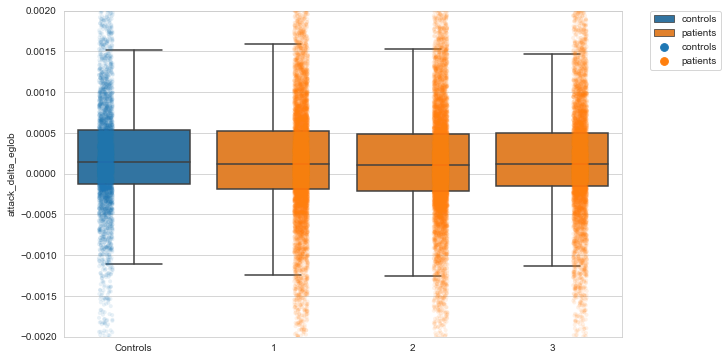

In [19]:
df_temp = df[~((df['group'] == 'controls') & (df['TP'] == 'TP2'))]
df_temp.loc[(df_temp['group'] == 'controls'), 'TP'] = 'Controls'

# plot boxplots of attack_delta_eglob for each TP and color by group
fig = plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='TP', y='attack_delta_eglob', hue='group', data=df_temp, showfliers = False, dodge=False)

# add swarmplot
ax = sns.stripplot(x='TP', y='attack_delta_eglob', hue='group', data=df_temp, dodge=True, size=4, alpha=0.1)

ax.set_xlabel('')
ax.set_ylim(-0.002, 0.002)
# set legend outside of plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [20]:
color1_alpha1 = (0.9647058823529412, 0.06274509803921569, 0.403921568627451, 1)
color1_alpha01 = (0.9647058823529412, 0.06274509803921569, 0.403921568627451, 0.1)

color2_alpha1 = (0.01568627450980392, 0.6078431372549019, 0.6039215686274509, 1)
color2_alpha01 = (0.01568627450980392, 0.6078431372549019, 0.6039215686274509, 0.1)

color3_alpha1 = (0.00392156862745098, 0.17647058823529413, 0.596078431372549, 1)
color3_alpha01 = (0.00392156862745098, 0.17647058823529413, 0.596078431372549, 0.1)

color4_alpha1 = (0.6549019607843137, 0.42745098039215684, 0.996078431372549, 1)
color4_alpha01 = (0.6549019607843137, 0.42745098039215684, 0.996078431372549, 0.1)
palette = sns.color_palette(['#f61067', '#049b9a', '#012D98', '#a76dfe'], n_colors=4)


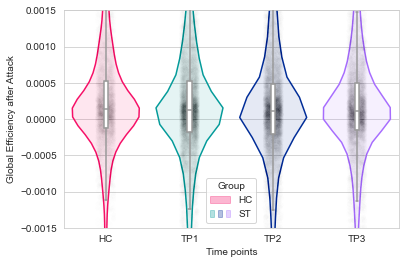

In [21]:
ax = sns.violinplot(x="TP", y="attack_delta_eglob", alpha=0.1,
                    hue="group",
                    data=df_temp, palette=palette,
                    dodge=False, inner=None)

# change alpha for edges and faces
ax.collections[0].set_edgecolor(color1_alpha1)
ax.collections[0].set_facecolor(color1_alpha01)
ax.collections[1].set_edgecolor(color2_alpha1)
ax.collections[1].set_facecolor(color2_alpha01)
ax.collections[2].set_edgecolor(color3_alpha1)
ax.collections[2].set_facecolor(color3_alpha01)
ax.collections[3].set_edgecolor(color4_alpha1)
ax.collections[3].set_facecolor(color4_alpha01)

ax = sns.stripplot(x="TP", y="attack_delta_eglob", color="k", alpha=0.002, size=5, data=df_temp,
                   jitter=True, zorder=2)

ax = sns.boxplot(x="TP", y="attack_delta_eglob", data=df_temp, color='white', width=0.05,
                 dodge=False, boxprops={"zorder": 3}, zorder=4, showfliers=False)

ax.set_xticklabels(['HC', 'TP1', 'TP2', 'TP3'])
ax.set_xlabel('Time points')
ax.set_ylabel('Global Efficiency after Attack')

hc_patch = mpatches.Patch(color=(0.9647058823529412, 0.06274509803921569, 0.403921568627451, 0.3))
tp1_patch = mpatches.Patch(color=(0.01568627450980392, 0.6078431372549019, 0.6039215686274509, 0.3))
tp2_patch = mpatches.Patch(color=(0.00392156862745098, 0.17647058823529413, 0.596078431372549, 0.3))
tp3_patch = mpatches.Patch(color=(0.6549019607843137, 0.42745098039215684, 0.996078431372549, 0.3))
ax.legend([hc_patch, (tp1_patch, tp2_patch, tp3_patch)], ['HC', 'ST'], title="Group",
          handler_map={tuple: HandlerTuple(ndivide=None)})

# ax2, _ = add_stat_annotation(ax, data=df_temp, x="TP", y="attack_delta_eglob",
#                     order=['HC', 'TP1', 'TP2', 'TP3'],
#                    # text_annot_custom=["0.0017", "0.0017", "0.006"],
#                    box_pairs=[('TP2', 'TP3'), ("TP1", "TP3"), ("HC", "TP3")],
#                    perform_stat_test=False, pvalues=[0.0017, 0.0017, 0.006],
#                    loc='outside', verbose=0)
# fig = ax2.get_figure()

ax.set_ylim(-0.0015, 0.0015)

fig = ax.get_figure()

plt.show()
df = df.dropna()

## Plotting linear relationship

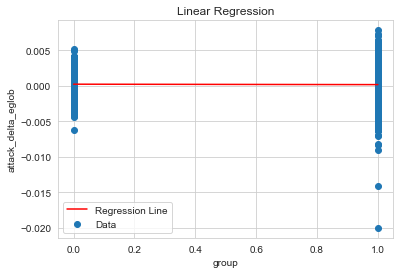

In [23]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Add a constant column for the intercept term
data = sm.add_constant(df)

data['group'] = data['group'].replace(['controls', 'patients'], [0, 1])
data = data.dropna()

# Fit the linear regression model
model = sm.OLS(data['attack_delta_eglob'], data[['const', 'group']])
results = model.fit()

# Generate predictions from the model
predictions = results.predict()

# Plot the scatter plot with regression line
plt.scatter(data['group'], data['attack_delta_eglob'], label='Data')
plt.plot(data['group'], predictions, color='red', label='Regression Line')
plt.xlabel('group')
plt.ylabel('attack_delta_eglob')
plt.title('Linear Regression')
plt.legend()
plt.show()

## Mixed effects model

In [39]:
md = smf.mixedlm("attack_delta_eglob ~ C(TP) + C(group) + 1", df, groups=df["subject"])
mdf = md.fit()

/Users/jk1/opt/anaconda3/envs/resilience_stroke/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [40]:
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: attack_delta_eglob
No. Observations: 29567   Method:             REML              
No. Groups:       93      Scale:              0.0000            
Min. group size:  214     Log-Likelihood:     165857.6605       
Max. group size:  366     Converged:          Yes               
Mean group size:  317.9                                         
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.000    0.000  4.782 0.000  0.000  0.000
C(TP)[T.2]            -0.000    0.000 -1.214 0.225 -0.000  0.000
C(TP)[T.3]             0.000    0.000  0.141 0.888 -0.000  0.000
C(group)[T.patients]  -0.000    0.000 -1.156 0.248 -0.000  0.000
Group Var              0.000    0.000                           

